In [1]:
# First we need to import all of the packages we will be using!
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# unordered scaffold model
# This is the definition of our system of ODEs for the model
def scaffold_model(states,t):
    # Our "states" list has the state variables in the following order:
    # S, K1p, K2, K2p, K3, K3p
    # SK1p, SK2, SK2p, SK3, SK3p
    # SK1pK2, SK1pK2p, SK1pK3, SK1pK3p, SK2K3, SK2pK3, SK2K3p, SK2pK3p
    # SK1pK2K3, SK1pK2pK3, SK1pK2K3p, SK1pK2pK3p 
    
    S = states[0]; K1p = states[1]; K2 = states[2]; K2p = states[3]; K3 = states[4]; K3p = states[5]
    SK1p = states[6]; SK2 = states[7]; SK2p = states[8]; SK3 = states[9]; SK3p = states[10]
    SK1pK2 = states[11]; SK1pK2p = states[12]; SK1pK3 = states[13]; SK1pK3p = states[14]
    SK2K3 = states[15]; SK2pK3 = states[16]; SK2K3p = states[17]; SK2pK3p = states[18]
    SK1pK2K3 = states[19]; SK1pK2pK3 = states[20]; SK1pK2K3p=states[21]; SK1pK2pK3p = states[22]
    
    # The above just makes it easier to relate our ODEs to the ones in the Homework text
    S_prime = -k_a*S*K1p -k_a*S*K2 -k_a*S*K2p -k_a3*S*K3 -k_a3*S*K3p\
                +k_d*SK1p +k_d*SK2 +k_d*SK2p +k_d*SK3 +k_d*SK3p
    K1p_prime = -k_a*S*K1p -k_a*SK2*K1p -k_a*SK2p*K1p -k_a*SK3*K1p -k_a*SK3p*K1p\
                -k_a*SK2K3*K1p -k_a*SK2pK3*K1p -k_a*SK2K3p*K1p -k_a*SK2pK3p*K1p\
                +k_d*SK1p + k_d*SK1pK2 + k_d*SK1pK2p + k_d*SK1pK3 + k_d*SK1pK3p\
                +k_d*SK1pK2K3 + k_d*SK1pK2pK3 + k_d*SK1pK2K3p + k_d*SK1pK2pK3p
    K2_prime = -k_a*S*K2 -k_a*SK1p*K2 -k_a*SK3*K2 -k_a*SK3p*K2 -k_a*SK1pK3*K2 -k_a*SK1pK3p*K2\
                +k_d*SK2 +k_d*SK1pK2 +k_d*SK2K3 +k_d*SK2K3p +k_d*SK1pK2K3 +k_d*SK1pK2K3p +k_u*K2p
    K2p_prime = -k_a*S*K2p -k_a*SK1p*K2p -k_a*SK3*K2p -k_a*SK3p*K2p -k_a*SK1pK3*K2p -k_a*SK1pK3p*K2p\
                +k_d*SK2p +k_d*SK1pK2p +k_d*SK2pK3 +k_d*SK2pK3p +k_d*SK1pK2pK3 +k_d*SK1pK2pK3p -k_u*K2p
    K3_prime = -k_a3*S*K3 -k_a3*SK1p*K3 -k_a3*SK2*K3 -k_a3*SK2p*K3 -k_a3*SK1pK2*K3 -k_a3*SK1pK2p*K3\
                +k_d*SK3 +k_d*SK1pK3 +k_d*SK2K3 +k_d*SK2pK3 +k_d*SK1pK2K3 +k_d*SK1pK2pK3 +k_u*K3p
    K3p_prime = -k_a3*S*K3p -k_a3*SK1p*K3p -k_a3*SK2*K3p -k_a3*SK2p*K3p -k_a3*SK1pK2*K3p -k_a3*SK1pK2p*K3p\
                +k_d*SK3p +k_d*SK1pK3p +k_d*SK2K3p +k_d*SK2pK3p +k_d*SK1pK2K3p +k_d*SK1pK2pK3p -k_u*K3p
    
    SK1p_prime = k_a*S*K1p + k_d*SK1pK2 + k_d*SK1pK2p + k_d*SK1pK3 + k_d*SK1pK3p\
                -k_d*SK1p -k_a*SK1p*K2 -k_a*SK1p*K2p -k_a3*SK1p*K3 -k_a3*SK1p*K3p
    SK2_prime =  k_a*S*K2 + k_d*SK1pK2 + k_d*SK2K3 + k_d*SK2K3p\
                -k_d*SK2 -k_a*SK2*K1p -k_a3*SK2*K3 -k_a3*SK2*K3p +k_u*SK2p
    SK2p_prime = k_a*S*K2p + k_d*SK1pK2p + k_d*SK2pK3 + k_d*SK2pK3p\
                -k_d*SK2p -k_a*SK2p*K1p -k_a3*SK2p*K3 -k_a3*SK2p*K3p -k_u*SK2p
    SK3_prime =  k_a3*S*K3 + k_d*SK1pK3 + k_d*SK2K3 + k_d*SK2pK3\
                -k_d*SK3 -k_a*SK3*K1p -k_a*SK3*K2 -k_a*SK3*K2p +k_u*SK3p
    SK3p_prime =  k_a3*S*K3p + k_d*SK1pK3p + k_d*SK2K3p + k_d*SK2pK3p\
                -k_d*SK3p -k_a*SK3p*K1p -k_a*SK3p*K2 -k_a*SK3p*K2p -k_u*SK3p
    
    SK1pK2_prime =  k_a*SK1p*K2 + k_a*SK2*K1p +k_d*SK1pK2K3 +k_d*SK1pK2K3p -k_p*SK1pK2\
                    -2*k_d*SK1pK2 -k_a3*SK1pK2*K3 -k_a3*SK1pK2*K3p +k_u*SK1pK2p
    SK1pK2p_prime = k_a*SK1p*K2p + k_a*SK2p*K1p +k_d*SK1pK2pK3 +k_d*SK1pK2pK3p +k_p*SK1pK2\
                    -2*k_d*SK1pK2p -k_a3*SK1pK2p*K3 -k_a3*SK1pK2p*K3p -k_u*SK1pK2p
    SK1pK3_prime =  k_a3*SK1p*K3 + k_a*SK3*K1p +k_d*SK1pK2K3 +k_d*SK1pK2pK3\
                    -2*k_d*SK1pK3 -k_a*SK1pK3*K2 -k_a*SK1pK3*K2p +k_u*SK1pK3p
    SK1pK3p_prime =  k_a3*SK1p*K3p + k_a*SK3p*K1p +k_d*SK1pK2K3p +k_d*SK1pK2pK3p\
                    -2*k_d*SK1pK3p -k_a*SK1pK3p*K2 -k_a*SK1pK3p*K2p -k_u*SK1pK3p
    SK2K3_prime =  k_a3*SK2*K3 + k_a*SK3*K2 +k_d*SK1pK2K3 +k_u*SK2pK3 +k_u*SK2K3p\
                    -2*k_d*SK2K3 -k_a*SK2K3*K1p
    SK2pK3_prime =  k_a3*SK2p*K3 + k_a*SK3*K2p +k_d*SK1pK2pK3 +k_u*SK2pK3p -k_u*SK2pK3\
                    -2*k_d*SK2pK3 -k_a*SK2pK3*K1p - k_p*SK2pK3
    SK2K3p_prime =  k_a3*SK2*K3p + k_a*SK3p*K2 +k_d*SK1pK2K3p +k_u*SK2pK3p -k_u*SK2K3p\
                    -2*k_d*SK2K3p -k_a*SK2K3p*K1p 
    SK2pK3p_prime =  k_a3*SK2p*K3p + k_a*SK3p*K2p +k_d*SK1pK2pK3p -2*k_u*SK2pK3p\
                    -2*k_d*SK2pK3p -k_a*SK2pK3p*K1p + k_p*SK2pK3
  
    SK1pK2K3_prime = k_a3*SK1pK2*K3 + k_a*SK1pK3*K2 + k_a*SK2K3*K1p\
                    -3*k_d*SK1pK2K3 - k_p*SK1pK2K3 + k_u*SK1pK2pK3 + k_u*SK1pK2K3p
    SK1pK2pK3_prime = k_a3*SK1pK2p*K3 + k_a*SK1pK3*K2p + k_a*SK2pK3*K1p + k_p*SK1pK2K3 +k_u*SK1pK2pK3p\
                    -3*k_d*SK1pK2pK3  -k_p*SK1pK2pK3 - k_u*SK1pK2pK3
    SK1pK2K3p_prime = k_a3*SK1pK2*K3p + k_a*SK1pK3p*K2 + k_a*SK2K3p*K1p +k_u*SK1pK2pK3p\
                    -3*k_d*SK1pK2K3p -k_p*SK1pK2K3p - k_u*SK1pK2K3p
    SK1pK2pK3p_prime = k_a3*SK1pK2p*K3p + k_a*SK1pK3p*K2p + k_a*SK2pK3p*K1p\
                    -3*k_d*SK1pK2pK3p -2*k_u*SK1pK2pK3p +k_p*SK1pK2pK3 + k_p*SK1pK2K3p
    
    states_prime = [S_prime, K1p_prime, K2_prime, K2p_prime, K3_prime, K3p_prime, 
                    SK1p_prime, SK2_prime, SK2p_prime, SK3_prime, SK3p_prime,
                    SK1pK2_prime, SK1pK2p_prime, SK1pK3_prime, SK1pK3p_prime, 
                    SK2K3_prime, SK2pK3_prime, SK2K3p_prime, SK2pK3p_prime,
                    SK1pK2K3_prime, SK1pK2pK3_prime, SK1pK2K3p_prime, SK1pK2pK3p_prime]
    
    return states_prime

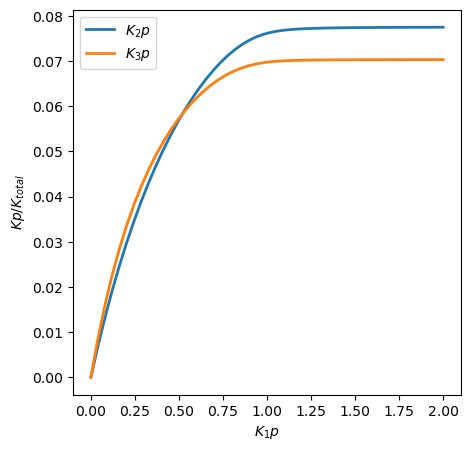

In [3]:
# STEADY-STATE responses of scaffold model

# PARAMETERS
# This is where we will define the parameters that we won't change for our model
k_a = 10
k_a3 = 1
k_d = 0.1
k_p = 1 
k_u = 0.1

# First, define our initial conditions
# These are going to be the same for values of 'K1p'
S = 1; K1p = 1; K2 = 1; K2p = 0; K3 = 10; K3p = 0
SK1p = 0; SK2 = 0; SK2p = 0; SK3 = 0; SK3p = 0
SK1pK2 = 0; SK1pK2p = 0; SK1pK3 = 0; SK1pK3p = 0
SK2K3 = 0; SK2pK3 = 0; SK2K3p = 0; SK2pK3p = 0
SK1pK2K3 = 0; SK1pK2pK3 = 0; SK1pK2K3p=0; SK1pK2pK3p = 0

# Here, we define our list of K1p values:
K1p_values = np.linspace(0, 2)

#This will be an array that hold the steady state results
ss_results = np.empty((2,0))

for K1p in K1p_values:
    # To intgrate ODEs, we need a "t" vector for time
    t = np.linspace(0,1000,1000)
    # We create our initial conditions for the scaffold
    states_0 = [S, K1p, K2, K2p, K3, K3p, SK1p, SK2, SK2p, SK3, SK3p,
                SK1pK2, SK1pK2p, SK1pK3, SK1pK3p, SK2K3, SK2pK3, SK2K3p, 
                SK2pK3p, SK1pK2K3, SK1pK2pK3, SK1pK2K3p, SK1pK2pK3p]
    # Now, integrate the scaffold model ODEs and put the results in "solution"
    solution = odeint(scaffold_model,states_0,t)
    ss_output= np.array([[solution[999,3]/K2], [solution[999,5]/K3]])
    # Append this result to the array of our results
    ss_results = np.append(ss_results, ss_output, axis=1)
    
# PLOT your steady-state results
# You can save this as a JPG or PNG and insert it into your HW answer (you can google how to do that!)
# Or you can just take a screenshot. Be warned, however, the figure needs to be big enough for us to see!
plt.figure(figsize=(5, 5))
plt.plot(K1p_values,ss_results[0, :],linewidth=2, label='$K_2p$')
plt.plot(K1p_values,ss_results[1, :],linewidth=2, label='$K_3p$')
plt.xlabel('$K_1p$')
plt.ylabel('$Kp/K_{total}$')
plt.legend()
plt.show()

In [4]:
# no scaffold model
# This is the definition of our system of ODEs
def base_model(states,t):
    # Our "states" list has the state variables in the following order:
    # K2, K2p, K3, K3p
    K2 = states[0]
    K2p = states[1]
    K3 = states[2]
    K3p = states[3]
    # The above just makes it easier to relate our ODEs to the ones in the Homework text
    K2_prime = -k_a*K1p*K2 + k_u*K2p
    K2p_prime = k_a*K1p*K2 - k_u*K2p
    K3_prime = -k_a*K2p*K3 + k_u*K3p
    K3p_prime = k_a*K2p*K3 - k_u*K3p
    states_prime = [K2_prime,K2p_prime,K3_prime,K3p_prime]
    return states_prime

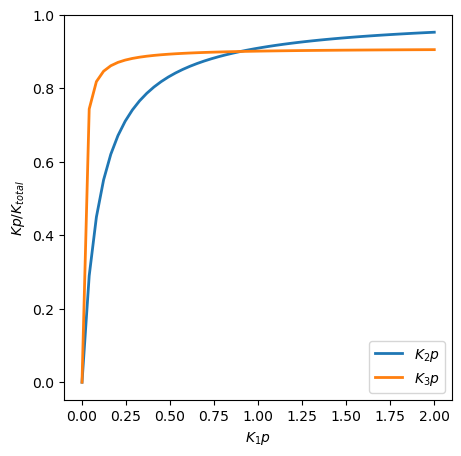

In [5]:
# STEADY-STATE responses--no scaffold

# PARAMETERS
# This is where we will define the parameters that we won't change for our model
k_a = 1
k_u = 0.1

# First, define our initial conditions
# These are going to be the same for values of 'K1p'
K2 = 1
K2star = 0.0
K3 = 10
K3star = 0.0

# Here, we define our list of K1p values:
K1p_values = np.linspace(0, 2)

#This will be an array that hold the steady state results
ss_results = np.empty((2,0))

for K1p in K1p_values:
    # To intgrate ODEs, we need a "t" vector for time
    t = np.linspace(0,1000,1000)
    # We create our initial conditions for the three-layer model
    states_0 = [K2,K2p,K3,K3p]
    # Now, integrate the three-layer model ODEs and put the results in "solution"
    solution = odeint(base_model,states_0,t)
    ss_output= np.array([[solution[999,1]/K2], [solution[999,3]/K3]])
    # Append this result to the array of our results
    ss_results = np.append(ss_results, ss_output, axis=1)
    
# PLOT your steady-state results
# You can save this as a JPG or PNG and insert it into your HW answer (you can google how to do that!)
# Or you can just take a screenshot. Be warned, however, the figure needs to be big enough for us to see!
plt.figure(figsize=(5, 5))
plt.plot(K1p_values,ss_results[0, :],linewidth=2, label='$K_2p$')
plt.plot(K1p_values,ss_results[1, :],linewidth=2, label='$K_3p$')
plt.xlabel('$K_1p$')
plt.ylabel('$Kp/K_{total}$')
plt.legend()
plt.show()

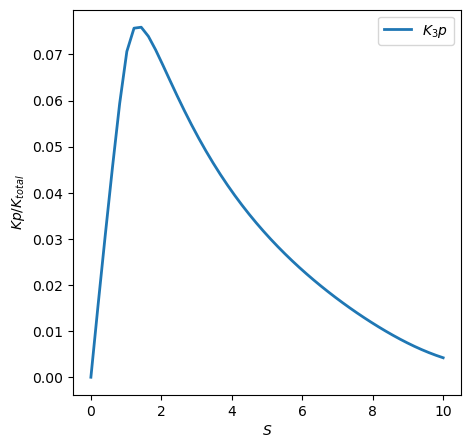

In [6]:
# Prozone Effect

# PARAMETERS
# This is where we will define the parameters that we won't change for our model
k_a = 10
k_a3 = 1
k_d = 0.1
k_p = 1 
k_u = 0.1

# First, define our initial conditions
# These are going to be the same for values of 's'
S = .1; K1p = 1; K2 = 1; K2p = 0; K3 = 10; K3p = 0
SK1p = 0; SK2 = 0; SK2p = 0; SK3 = 0; SK3p = 0
SK1pK2 = 0; SK1pK2p = 0; SK1pK3 = 0; SK1pK3p = 0
SK2K3 = 0; SK2pK3 = 0; SK2K3p = 0; SK2pK3p = 0
SK1pK2K3 = 0; SK1pK2pK3 = 0; SK1pK2K3p=0; SK1pK2pK3p = 0

# Here, we define our list of S values:
S_values = np.linspace(0, 10)

#This will be an array that hold the steady state results
ss_results = []

for S in S_values:
    # To intgrate ODEs, we need a "t" vector for time
    t = np.linspace(0,1000,1000)
    # We create our initial conditions for the scaffold
    states_0 = [S, K1p, K2, K2p, K3, K3p, SK1p, SK2, SK2p, SK3, SK3p,
                SK1pK2, SK1pK2p, SK1pK3, SK1pK3p, SK2K3, SK2pK3, SK2K3p, 
                SK2pK3p, SK1pK2K3, SK1pK2pK3, SK1pK2K3p, SK1pK2pK3p]
    # Now, integrate the scaffold model ODEs and put the results in "solution"
    solution = odeint(scaffold_model,states_0,t)
    ss_output= solution[999, 5]/K3
    # Append this result to the array of our results
    ss_results = np.append(ss_results, ss_output)
    
# PLOT your steady-state results
# You can save this as a JPG or PNG and insert it into your HW answer (you can google how to do that!)
# Or you can just take a screenshot. Be warned, however, the figure needs to be big enough for us to see!
plt.figure(figsize=(5, 5))
plt.plot(S_values,ss_results,linewidth=2, label='$K_3p$')
plt.xlabel('$S$')
plt.ylabel('$Kp/K_{total}$')
plt.legend()
plt.show()

In [8]:
# Ordered Binding
# This is the definition of our system of ODEs for the model
def ordered_model(states,t):
    # Our "states" list has the state variables in the following order:
    # S, K1p, K2, K2p, K3, K3p, SK1p, SK1pK2, SK1pK2p, SK1pK2pK3, SK1pK2pK3p
    
    S = states[0]; K1p = states[1]; K2 = states[2]; K2p = states[3]; K3 = states[4]; K3p = states[5]
    SK1p = states[6]; SK1pK2 = states[7]; SK1pK2p = states[8]; SK1pK2pK3 = states[9]; SK1pK2pK3p = states[10]
    
    # The above just makes it easier to relate our ODEs to the ones in the Homework text
    
    ### fill in your change equations
    S_prime = -k_a*S*K1p + k_d*SK1p
    K1p_prime = -k_a*S*K1p + k_d*SK1p
    K2_prime = -k_a*SK1p*K2 + k_d*SK1pK2 + k_u*K2p
    K2p_prime = -k_a*SK1p*K2p + k_d*SK1pK2p - k_u*K2p
    K3_prime = -k_a3*SK1pK2p*K3 + k_d*SK1pK2pK3 + k_u*K3p
    K3p_prime = -k_a3*SK1pK2p*K3p + k_d*SK1pK2pK3p - k_u*K3p
    SK1p_prime = k_a*S*K1p - k_a*SK1p*K2 - k_a*SK1p*K2p + k_d*SK1pK2 + k_d*SK1pK2p - k_d*SK1p
    SK1pK2_prime = k_a*SK1p*K2 - k_d*SK1pK2 - k_p*SK1pK2 + k_u*SK1pK2p
    SK1pK2p_prime = k_a*SK1p*K2p - k_a3*SK1pK2p*K3 - k_a3*SK1pK2p*K3p + k_d*SK1pK2pK3 + k_d*SK1pK2pK3p - k_d*SK1pK2p + k_p*SK1pK2 - k_u*SK1pK2p
    SK1pK2pK3_prime = k_a3*SK1pK2p*K3 - k_d*SK1pK2pK3 - k_p*SK1pK2pK3 + k_u*SK1pK2pK3p
    SK1pK2pK3p_prime = k_a3*SK1pK2p*K3p - k_d*SK1pK2pK3p + k_p*SK1pK2pK3 - k_u*SK1pK2pK3p
    ###
    
    states_prime = [S_prime, K1p_prime, K2_prime, K2p_prime, K3_prime, K3p_prime, 
                    SK1p_prime, SK1pK2_prime, SK1pK2p_prime, SK1pK2pK3_prime, SK1pK2pK3p_prime]
    
    return states_prime

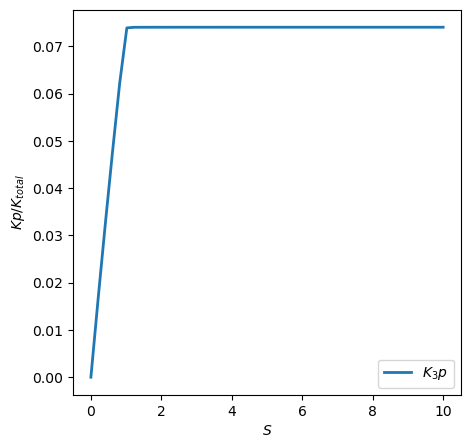

In [9]:
# Prozone efect--Ordered binding

# PARAMETERS
# This is where we will define the parameters that we won't change for our model
k_a = 10
k_a3 = 1
k_d = 0.1
k_p = 1 
k_u = 0.1

# First, define our initial conditions
# These are going to be the same for values of 'S'
S = 1; K1p = 1; K2 = 1; K2p = 0; K3 = 10; K3p = 0
SK1p = 0; SK1pK2 = 0; SK1pK2p = 0; SK1pK2pK3 = 0; SK1pK2pK3p = 0

# Here, we define our list of S values:
S_values = np.linspace(0, 10)

#This will be an array that hold the steady state results
ss_results = []

for S in S_values:
    # To intgrate ODEs, we need a "t" vector for time
    t = np.linspace(0,100,1000)
    # We create our initial conditions for the scaffold
    states_0 = [S, K1p, K2, K2p, K3, K3p, SK1p, SK1pK2, SK1pK2p, SK1pK2pK3, SK1pK2pK3p]
    # Now, integrate the scaffold model ODEs and put the results in "solution"
    solution = odeint(ordered_model,states_0,t)
    ss_output= solution[999, 5]/K3
    # Append this result to the array of our results
    ss_results = np.append(ss_results, ss_output)
    
# PLOT your steady-state results
# You can save this as a JPG or PNG and insert it into your HW answer (you can google how to do that!)
# Or you can just take a screenshot. Be warned, however, the figure needs to be big enough for us to see!
plt.figure(figsize=(5, 5))
plt.plot(S_values,ss_results,linewidth=2, label='$K_3p$')
plt.xlabel('$S$')
plt.ylabel('$Kp/K_{total}$')
plt.legend()
plt.show()

In [15]:
# crosstalk scaffold model
# This is the definition of our system of ODEs for the model
def crosstalk_model(states,t):
    # Our "states" list has the state variables in the following order:
    # S1, K1p, K2, K2p, K3, K3p
    # S1K1p, S1K2, S1K2p, S1K3, S1K3p
    # S1K1pK2, S1K1pK2p, S1K1pK3, S1K1pK3p, S1K2K3, S1K2pK3, S1K2K3p, S1K2pK3p
    # S1K1pK2K3, S1K1pK2pK3, S1K1pK2K3p, S1K1pK2pK3p 
    
    S1 = states[0]; K1p = states[1]; K2 = states[2]; K2p = states[3]; K3 = states[4]; K3p = states[5]
    S1K1p = states[6]; S1K2 = states[7]; S1K2p = states[8]; S1K3 = states[9]; S1K3p = states[10]
    S1K1pK2 = states[11]; S1K1pK2p = states[12]; S1K1pK3 = states[13]; S1K1pK3p = states[14]
    S1K2K3 = states[15]; S1K2pK3 = states[16]; S1K2K3p = states[17]; S1K2pK3p = states[18]
    S1K1pK2K3 = states[19]; S1K1pK2pK3 = states[20]; S1K1pK2K3p=states[21]; S1K1pK2pK3p = states[22]
    
    S2 = states[23]; K4 = states[24]; K4p = states[25]; S2K2 = states[26];  S2K2p = states[27]; S2K4 = states[28]
    S2K4p = states[29]; S2K2K4 = states[30]; S2K2pK4 = states[31]; S2K2K4p = states[32]; S2K2pK4p = states[33]
    
    # The above just makes it easier to relate our ODEs to the ones in the Homework text
    S1_prime = -k_a*S1*K1p -k_a*S1*K2 -k_a*S1*K2p -k_a3*S1*K3 -k_a3*S1*K3p\
                +k_d*S1K1p +k_d*S1K2 +k_d*S1K2p +k_d*S1K3 +k_d*S1K3p
    K1p_prime = -k_a*S1*K1p -k_a*S1K2*K1p -k_a*S1K2p*K1p -k_a*S1K3*K1p -k_a*S1K3p*K1p\
                -k_a*S1K2K3*K1p -k_a*S1K2pK3*K1p -k_a*S1K2K3p*K1p -k_a*S1K2pK3p*K1p\
                +k_d*S1K1p + k_d*S1K1pK2 + k_d*S1K1pK2p + k_d*S1K1pK3 + k_d*S1K1pK3p\
                +k_d*S1K1pK2K3 + k_d*S1K1pK2pK3 + k_d*S1K1pK2K3p + k_d*S1K1pK2pK3p
    
    ### Modify the following change equations
    K2_prime = -k_a*S1*K2 -k_a*S1K1p*K2 -k_a*S1K3*K2 -k_a*S1K3p*K2 -k_a*S1K1pK3*K2 -k_a*S1K1pK3p*K2\
                +k_d*S1K2 +k_d*S1K1pK2 +k_d*S1K2K3 +k_d*S1K2K3p +k_d*S1K1pK2K3 +k_d*S1K1pK2K3p +k_u*K2p-k_a*S2*K2 +k_d*S2K2 -k_a*S2K4*K2 -k_a*S2K4p*K2 +k_d*S2K2K4 +k_d*S2K2K4p
    K2p_prime = -k_a*S1*K2p -k_a*S1K1p*K2p -k_a*S1K3*K2p -k_a*S1K3p*K2p -k_a*S1K1pK3*K2p -k_a*S1K1pK3p*K2p\
                +k_d*S1K2p +k_d*S1K1pK2p +k_d*S1K2pK3 +k_d*S1K2pK3p +k_d*S1K1pK2pK3 +k_d*S1K1pK2pK3p -k_u*K2p-k_a*S2*K2p +k_d*S2K2p -k_a*S2K4*K2p -k_a*S2K4p*K2p +k_d*S2K2pK4 +k_d*S2K2pK4p
    ###
    
    K3_prime = -k_a3*S1*K3 -k_a3*S1K1p*K3 -k_a3*S1K2*K3 -k_a3*S1K2p*K3 -k_a3*S1K1pK2*K3 -k_a3*S1K1pK2p*K3\
                +k_d*S1K3 +k_d*S1K1pK3 +k_d*S1K2K3 +k_d*S1K2pK3 +k_d*S1K1pK2K3 +k_d*S1K1pK2pK3 +k_u*K3p
    K3p_prime = -k_a3*S1*K3p -k_a3*S1K1p*K3p -k_a3*S1K2*K3p -k_a3*S1K2p*K3p -k_a3*S1K1pK2*K3p -k_a3*S1K1pK2p*K3p\
                +k_d*S1K3p +k_d*S1K1pK3p +k_d*S1K2K3p +k_d*S1K2pK3p +k_d*S1K1pK2K3p +k_d*S1K1pK2pK3p -k_u*K3p
    
    S1K1p_prime = k_a*S1*K1p + k_d*S1K1pK2 + k_d*S1K1pK2p + k_d*S1K1pK3 + k_d*S1K1pK3p\
                -k_d*S1K1p -k_a*S1K1p*K2 -k_a*S1K1p*K2p -k_a3*S1K1p*K3 -k_a3*S1K1p*K3p
    S1K2_prime =  k_a*S1*K2 + k_d*S1K1pK2 + k_d*S1K2K3 + k_d*S1K2K3p\
                -k_d*S1K2 -k_a*S1K2*K1p -k_a3*S1K2*K3 -k_a3*S1K2*K3p +k_u*S1K2p
    S1K2p_prime = k_a*S1*K2p + k_d*S1K1pK2p + k_d*S1K2pK3 + k_d*S1K2pK3p\
                -k_d*S1K2p -k_a*S1K2p*K1p -k_a3*S1K2p*K3 -k_a3*S1K2p*K3p -k_u*S1K2p
    S1K3_prime =  k_a3*S1*K3 + k_d*S1K1pK3 + k_d*S1K2K3 + k_d*S1K2pK3\
                -k_d*S1K3 -k_a*S1K3*K1p -k_a*S1K3*K2 -k_a*S1K3*K2p +k_u*S1K3p
    S1K3p_prime =  k_a3*S1*K3p + k_d*S1K1pK3p + k_d*S1K2K3p + k_d*S1K2pK3p\
                -k_d*S1K3p -k_a*S1K3p*K1p -k_a*S1K3p*K2 -k_a*S1K3p*K2p -k_u*S1K3p
    
    S1K1pK2_prime =  k_a*S1K1p*K2 + k_a*S1K2*K1p +k_d*S1K1pK2K3 +k_d*S1K1pK2K3p -k_p*S1K1pK2\
                    -2*k_d*S1K1pK2 -k_a3*S1K1pK2*K3 -k_a3*S1K1pK2*K3p +k_u*S1K1pK2p
    S1K1pK2p_prime = k_a*S1K1p*K2p + k_a*S1K2p*K1p +k_d*S1K1pK2pK3 +k_d*S1K1pK2pK3p +k_p*S1K1pK2\
                    -2*k_d*S1K1pK2p -k_a3*S1K1pK2p*K3 -k_a3*S1K1pK2p*K3p -k_u*S1K1pK2p
    S1K1pK3_prime =  k_a3*S1K1p*K3 + k_a*S1K3*K1p +k_d*S1K1pK2K3 +k_d*S1K1pK2pK3\
                    -2*k_d*S1K1pK3 -k_a*S1K1pK3*K2 -k_a*S1K1pK3*K2p +k_u*S1K1pK3p
    S1K1pK3p_prime =  k_a3*S1K1p*K3p + k_a*S1K3p*K1p +k_d*S1K1pK2K3p +k_d*S1K1pK2pK3p\
                    -2*k_d*S1K1pK3p -k_a*S1K1pK3p*K2 -k_a*S1K1pK3p*K2p -k_u*S1K1pK3p
    S1K2K3_prime =  k_a3*S1K2*K3 + k_a*S1K3*K2 +k_d*S1K1pK2K3 +k_u*S1K2pK3 +k_u*S1K2K3p\
                    -2*k_d*S1K2K3 -k_a*S1K2K3*K1p
    S1K2pK3_prime =  k_a3*S1K2p*K3 + k_a*S1K3*K2p +k_d*S1K1pK2pK3 +k_u*S1K2pK3p -k_u*S1K2pK3\
                    -2*k_d*S1K2pK3 -k_a*S1K2pK3*K1p - k_p*S1K2pK3
    S1K2K3p_prime =  k_a3*S1K2*K3p + k_a*S1K3p*K2 +k_d*S1K1pK2K3p +k_u*S1K2pK3p -k_u*S1K2K3p\
                    -2*k_d*S1K2K3p -k_a*S1K2K3p*K1p 
    S1K2pK3p_prime =  k_a3*S1K2p*K3p + k_a*S1K3p*K2p +k_d*S1K1pK2pK3p -2*k_u*S1K2pK3p\
                    -2*k_d*S1K2pK3p -k_a*S1K2pK3p*K1p + k_p*S1K2pK3
  
    S1K1pK2K3_prime = k_a3*S1K1pK2*K3 + k_a*S1K1pK3*K2 + k_a*S1K2K3*K1p\
                    -3*k_d*S1K1pK2K3 - k_p*S1K1pK2K3 + k_u*S1K1pK2pK3 + k_u*S1K1pK2K3p
    S1K1pK2pK3_prime = k_a3*S1K1pK2p*K3 + k_a*S1K1pK3*K2p + k_a*S1K2pK3*K1p + k_p*S1K1pK2K3 +k_u*S1K1pK2pK3p\
                    -3*k_d*S1K1pK2pK3  -k_p*S1K1pK2pK3 - k_u*S1K1pK2pK3
    S1K1pK2K3p_prime = k_a3*S1K1pK2*K3p + k_a*S1K1pK3p*K2 + k_a*S1K2K3p*K1p +k_u*S1K1pK2pK3p\
                    -3*k_d*S1K1pK2K3p -k_p*S1K1pK2K3p - k_u*S1K1pK2K3p
    S1K1pK2pK3p_prime = k_a3*S1K1pK2p*K3p + k_a*S1K1pK3p*K2p + k_a*S1K2pK3p*K1p\
                    -3*k_d*S1K1pK2pK3p -2*k_u*S1K1pK2pK3p +k_p*S1K1pK2pK3 + k_p*S1K1pK2K3p
    
    S2_prime = -k_a*S2*K2 -k_a*S2*K2p -k_a4*S2*K4 -k_a4*S2*K4p\
                +k_d*S2K2 +k_d*S2K2p +k_d*S2K4 +k_d*S2K4p
    K4_prime = -k_a4*S2*K4 -k_a4*S2K2*K4 -k_a4*S2K2p*K4\
                +k_d*S2K4 +k_d*S2K2K4 +k_d*S2K2pK4 +k_u*K4p
    K4p_prime = -k_a4*S2*K4p -k_a4*S2K2*K4p -k_a4*S2K2p*K4p\
                +k_d*S2K4p +k_d*S2K2K4p +k_d*S2K2pK4p -k_u*K4p
    S2K2_prime =  k_a*S2*K2 + k_d*S2K2K4 + k_d*S2K2K4p\
                -k_d*S2K2 -k_a4*S2K2*K4 -k_a4*S2K2*K4p +k_u*S2K2p
    S2K2p_prime =  k_a*S2*K2p + k_d*S2K2pK4 + k_d*S2K2pK4p\
                -k_d*S2K2p -k_a4*S2K2p*K4 -k_a4*S2K2p*K4p -k_u*S2K2p
    S2K4_prime =  k_a4*S2*K4 + k_d*S2K2K4 + k_d*S2K2pK4\
                -k_d*S2K4 -k_a*S2K4*K2 -k_a*S2K4*K2p +k_u*S2K4p
    S2K4p_prime =  k_a4*S2*K4p + k_d*S2K2K4p + k_d*S2K2pK4p\
                -k_d*S2K4p -k_a*S2K4p*K2 -k_a*S2K4p*K2p -k_u*S2K4p
    S2K2K4_prime =  k_a4*S2K2*K4 + k_a*S2K4*K2 +k_u*S2K2pK4 +k_u*S2K2K4p\
                    -2*k_d*S2K2K4
    S2K2pK4_prime =  k_a4*S2K2p*K4 + k_a*S2K4*K2p +k_u*S2K2pK4p -k_u*S2K2pK4\
                    -2*k_d*S2K2pK4 - k_p*S2K2pK4
    S2K2K4p_prime =  k_a4*S2K2*K4p + k_a*S2K4p*K2 +k_u*S2K2pK4p -k_u*S2K2K4p\
                    -2*k_d*S2K2K4p
    S2K2pK4p_prime =  k_a4*S2K2p*K4p + k_a*S2K4p*K2p -2*k_u*S2K2pK4p\
                    -2*k_d*S2K2pK4p + k_p*S2K2pK4
    
    states_prime = [S1_prime, K1p_prime, K2_prime, K2p_prime, K3_prime, K3p_prime, 
                    S1K1p_prime, S1K2_prime, S1K2p_prime, S1K3_prime, S1K3p_prime,
                    S1K1pK2_prime, S1K1pK2p_prime, S1K1pK3_prime, S1K1pK3p_prime, 
                    S1K2K3_prime, S1K2pK3_prime, S1K2K3p_prime, S1K2pK3p_prime,
                    S1K1pK2K3_prime, S1K1pK2pK3_prime, S1K1pK2K3p_prime, S1K1pK2pK3p_prime,
                    S2_prime, K4_prime, K4p_prime, S2K2_prime,  S2K2p_prime, S2K4_prime,
                    S2K4p_prime, S2K2K4_prime, S2K2pK4_prime, S2K2K4p_prime, S2K2pK4p_prime]
    
    return states_prime

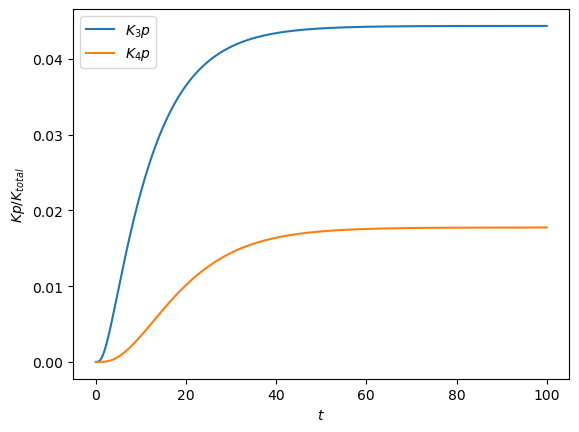

In [16]:
#Dynamics of Crosstalk

# PARAMETERS
# This is where we will define the parameters that we won't change for our model
k_a = 10
k_a3 = 1
k_a4 = 1
k_d = 0.1
k_p = 1 
k_u = 0.1

# First, define our initial conditions
# These are going to be the same for values of 'K1p'
S = 1; K1p = 1; K2 = 1; K2p = 0; K3 = 10; K3p = 0
SK1p = 0; SK2 = 0; SK2p = 0; SK3 = 0; SK3p = 0
SK1pK2 = 0; SK1pK2p = 0; SK1pK3 = 0; SK1pK3p = 0
SK2K3 = 0; SK2pK3 = 0; SK2K3p = 0; SK2pK3p = 0
SK1pK2K3 = 0; SK1pK2pK3 = 0; SK1pK2K3p=0; SK1pK2pK3p = 0
S2 = 1; K4 = 10; K4p = 0; S2K2 = 0;  S2K2p = 0; S2K4 = 0
S2K4p = 0; S2K2K4 = 0; S2K2pK4 = 0; S2K2K4p = 0; S2K2pK4p = 0

t = np.linspace(0,100,1000)
states_0 = [S, K1p, K2, K2p, K3, K3p, SK1p, SK2, SK2p, SK3, SK3p,            
            SK1pK2, SK1pK2p, SK1pK3, SK1pK3p, SK2K3, SK2pK3, SK2K3p, 
            SK2pK3p, SK1pK2K3, SK1pK2pK3, SK1pK2K3p, SK1pK2pK3p,
            S2, K4, K4p, S2K2,  S2K2p, S2K4, S2K4p, S2K2K4, S2K2pK4, S2K2K4p, S2K2pK4p]

solution = odeint(crosstalk_model,states_0,t)
plt.plot(t, solution[:, 5]/K3, label='$K_3p$')
plt.plot(t, solution[:, 25]/K4, label='$K_4p$')
plt.xlabel('$t$')
plt.ylabel('$Kp/K_{total}$')
plt.legend()